In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt

In [78]:
# Import data using datetime and set index to datetime
df = pd.read_csv(r'C:\Users\91783\Desktop\Bhiwadi_hourly\June2022.csv',
                                parse_dates=['DateTime'],
                                index_col=['DateTime'])

df.head()

,PM2.5,PM10,NO,NO2,SO2,CO,Ozone,Temp,RH,WS,WD,SR
DateTime,,,,,,,,,,,,
2021-01-01 00:00:00,389.82,636.00,38.56,58.10,16.39,2.16,11.52,11.51,68.00,0.33,145.91,6.65
2021-01-01 01:00:00,396.16,635.55,24.84,53.81,22.61,1.25,13.61,11.29,67.55,0.45,189.59,6.65
2021-01-01 02:00:00,332.44,519.05,37.31,57.53,24.74,1.24,6.55,10.55,70.00,0.42,145.36,6.65
2021-01-01 03:00:00,274.54,453.33,22.92,49.74,9.11,1.37,5.68,10.12,71.94,0.28,101.87,6.65
2021-01-01 04:00:00,294.05,446.65,19.70,36.77,11.29,1.64,6.87,9.93,73.20,0.36,145.29,6.65


In [79]:
df.tail()

,PM2.5,PM10,NO,NO2,SO2,CO,Ozone,Temp,RH,WS,WD,SR
DateTime,,,,,,,,,,,,
2022-06-19 12:00:00,115.04,235.18,35.26,51.33,29.86,0.92,25.95,24.37,51.72,50.98,194.23,125.4
2022-06-19 13:00:00,115.04,235.18,35.26,51.33,29.86,0.92,25.95,24.37,51.72,50.98,194.23,125.4
2022-06-19 14:00:00,115.04,235.18,35.26,51.33,29.86,0.92,25.95,24.37,51.72,50.98,194.23,125.4
2022-06-19 15:00:00,115.04,235.18,35.26,51.33,29.86,0.92,25.95,24.37,51.72,50.98,194.23,125.4
2022-06-19 16:00:00,115.04,235.18,35.26,51.33,29.86,0.92,25.95,24.37,51.72,50.98,194.23,125.4


<AxesSubplot:>

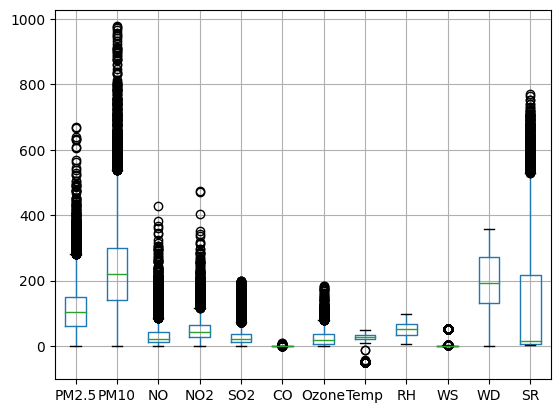

In [80]:
#Box plot
#pd.options.display.mpl_style = False
df.boxplot()

In [81]:
dataset_columns = df.columns.tolist()
dataset_columns

['PM2.5',
 'PM10',
 'NO',
 'NO2',
 'SO2',
 'CO',
 'Ozone',
 'Temp',
 'RH',
 'WS',
 'WD',
 'SR']

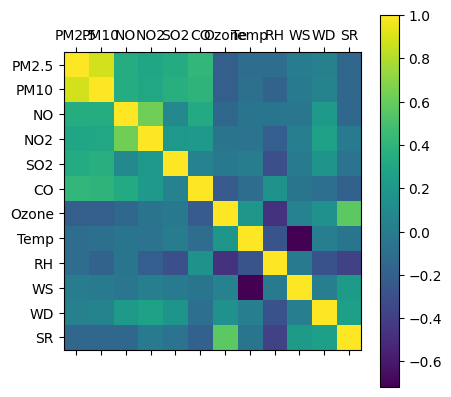

In [82]:
#Analysing relationship between different features
# cor_cols = ['pollution', 'wnd_spd', 'rain', 'snow', 'temp']
cor_cols = dataset_columns
plt.matshow(df.corr())
plt.xticks(range(len(cor_cols)), cor_cols)
plt.yticks(range(len(cor_cols)), cor_cols)
plt.colorbar()
plt.show()

In [83]:
from sklearn.preprocessing import LabelEncoder

# Encode non categorical values
values = df.values
encoder = LabelEncoder()
values[:,11] = encoder.fit_transform(values[:,11])
values = values.astype('float32')
values[:11]

array([[3.8982e+02, 6.3600e+02, 3.8560e+01, 5.8100e+01, 1.6390e+01,
        2.1600e+00, 1.1520e+01, 1.1510e+01, 6.8000e+01, 3.3000e-01,
        1.4591e+02, 1.1200e+02],
       [3.9616e+02, 6.3555e+02, 2.4840e+01, 5.3810e+01, 2.2610e+01,
        1.2500e+00, 1.3610e+01, 1.1290e+01, 6.7550e+01, 4.5000e-01,
        1.8959e+02, 1.1200e+02],
       [3.3244e+02, 5.1905e+02, 3.7310e+01, 5.7530e+01, 2.4740e+01,
        1.2400e+00, 6.5500e+00, 1.0550e+01, 7.0000e+01, 4.2000e-01,
        1.4536e+02, 1.1200e+02],
       [2.7454e+02, 4.5333e+02, 2.2920e+01, 4.9740e+01, 9.1100e+00,
        1.3700e+00, 5.6800e+00, 1.0120e+01, 7.1940e+01, 2.8000e-01,
        1.0187e+02, 1.1200e+02],
       [2.9405e+02, 4.4665e+02, 1.9700e+01, 3.6770e+01, 1.1290e+01,
        1.6400e+00, 6.8700e+00, 9.9300e+00, 7.3200e+01, 3.6000e-01,
        1.4529e+02, 1.1200e+02],
       [2.7336e+02, 3.9452e+02, 2.0950e+01, 4.0040e+01, 1.3640e+01,
        1.5100e+00, 6.2300e+00, 9.4800e+00, 7.2050e+01, 4.0000e-01,
        1.6613e+02,

In [84]:
#Normalising data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_dataset = scaler.fit_transform(values)

In [85]:
#Creating a window for previous data
def to_supervised(train):
  window_size = 4
  X = []
  Y = []
  for i in range(window_size, len(train)):
    X.append(train[i-window_size:i,:])
    Y.append(train[i,0:1])
    
  return X,Y

In [86]:
X, Y = to_supervised(scaled_dataset)
X = np.array(X)
Y = np.array(Y)
print('Y' ,Y.shape)
print('X' ,X.shape)

Y (12829, 1)
X (12829, 4, 12)


In [87]:
#Splitting the dataset 12829*0.2=2565 => - 10264
#Splitting the dataset 12829*0.3=8981 => -8981
n_train = 2565
X_train, X_test = X[n_train:,] , X[:n_train,]
print('X_train' ,X_train.shape)
print('X_test' ,X_test.shape)

Y_train, Y_test = Y[n_train:,] , Y[:n_train,]
print('Y_train' ,Y_train.shape)
print('Y_test' ,Y_test.shape)

X_train (10264, 4, 12)
X_test (2565, 4, 12)
Y_train (10264, 1)
Y_test (2565, 1)


In [88]:

#Importing LSTM model
from tensorflow import keras
from tensorflow.keras import layers
from keras.models import Sequential
from keras.layers import Dense, Dropout,LSTM
import tensorflow as tf
model = Sequential()

model.add(LSTM(units = 100, return_sequences = True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))

model.add(LSTM(units = 100, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units = 100))
model.add(Dropout(0.2))

model.add(Dense(units = 1))

#model.compile(optimizer = 'adam', loss = 'mean_squared_error')     
opt = keras.optimizers.Adam(learning_rate=0.1)
model.compile(loss='mean_squared_error', optimizer=opt)

In [89]:
history = model.fit(X_train, Y_train, epochs=50,
                    batch_size=32, validation_data=(X_test,Y_test),
                    verbose=2, shuffle=False)

Epoch 1/50
321/321 - 8s - loss: 0.3421 - val_loss: 0.0158 - 8s/epoch - 24ms/step
Epoch 2/50
321/321 - 4s - loss: 0.0121 - val_loss: 0.0182 - 4s/epoch - 12ms/step
Epoch 3/50
321/321 - 4s - loss: 0.0118 - val_loss: 0.0108 - 4s/epoch - 12ms/step
Epoch 4/50
321/321 - 4s - loss: 0.0108 - val_loss: 0.0119 - 4s/epoch - 12ms/step
Epoch 5/50
321/321 - 4s - loss: 0.0110 - val_loss: 0.0125 - 4s/epoch - 12ms/step
Epoch 6/50
321/321 - 4s - loss: 0.0112 - val_loss: 0.0129 - 4s/epoch - 12ms/step
Epoch 7/50
321/321 - 4s - loss: 0.0113 - val_loss: 0.0137 - 4s/epoch - 12ms/step
Epoch 8/50
321/321 - 4s - loss: 0.0116 - val_loss: 0.0151 - 4s/epoch - 12ms/step
Epoch 9/50
321/321 - 4s - loss: 0.0119 - val_loss: 0.0171 - 4s/epoch - 12ms/step
Epoch 10/50
321/321 - 4s - loss: 0.0122 - val_loss: 0.0190 - 4s/epoch - 12ms/step
Epoch 11/50
321/321 - 4s - loss: 0.0124 - val_loss: 0.0211 - 4s/epoch - 12ms/step
Epoch 12/50
321/321 - 4s - loss: 0.0125 - val_loss: 0.0228 - 4s/epoch - 13ms/step
Epoch 13/50
321/321 - 5s 

In [90]:
#Taking predictions
Y_pred = model.predict(X_test)

from sklearn.metrics import mean_squared_error
mse = mean_squared_error(Y_test, Y_pred)

print(mse)
rmse = np.sqrt(mse)
print(rmse)

81/81 [==============================] - 1s 3ms/step
0.029136913
0.17069538


In [91]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape = mean_absolute_percentage_error(Y_test, Y_pred)
print('MAPE', mape)

MAPE 65.94660878181458


In [92]:
from sklearn.metrics import r2_score
r2 = r2_score(Y_test, Y_pred)
r2

-2.0320635940479783

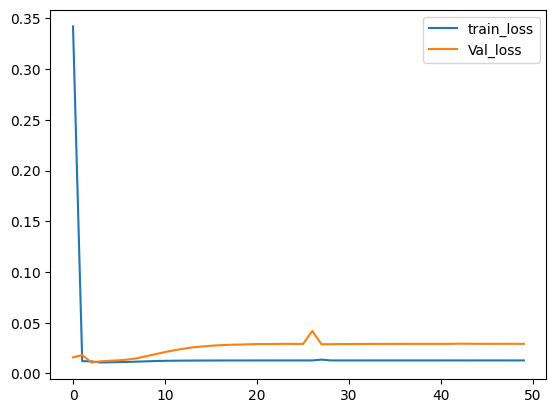

In [93]:
# plot history
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='Val_loss')
plt.legend()
plt.show()

In [94]:
me = np.mean(Y_pred - Y_test)
print('ME')
print(me)
mae = np.mean(np.abs(Y_pred - Y_test))    # MAE
print('MAE')
print(mae)
mpe = np.mean((Y_pred - Y_test)/Y_test)   # MPE
print('MPE')
print(mpe)
rmse = np.mean((Y_pred - Y_test)**2)**.5  # RMSE
print('RMSE')
print(rmse)
 

ME
-0.13974017
MAE
0.14083269
MPE
-0.54416615
RMSE
0.17069538042146656
